In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/paysim.csv")

print("Shape:", df.shape)
display(df.head())
display(df.dtypes)


Shape: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [9]:
fraud_rate = df["isFraud"].mean()
flag_rate = df["isFlaggedFraud"].mean()

print(f"Fraud rate: {fraud_rate:.6f} ({fraud_rate*100:.4f}%)")
print(f"Flagged fraud rate: {flag_rate:.6f} ({flag_rate*100:.4f}%)")

df["isFraud"].value_counts()


Fraud rate: 0.001291 (0.1291%)
Flagged fraud rate: 0.000003 (0.0003%)


isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
fraud_by_type = (
    df.groupby("type")["isFraud"]
      .agg(count="count", frauds="sum", fraud_rate="mean")
      .sort_values("fraud_rate", ascending=False)
)
display(fraud_by_type)


,count,frauds,fraud_rate
type,,,
TRANSFER,532909,4097,0.007688
CASH_OUT,2237500,4116,0.001840
CASH_IN,1399284,0,0.000000
DEBIT,41432,0,0.000000
PAYMENT,2151495,0,0.000000


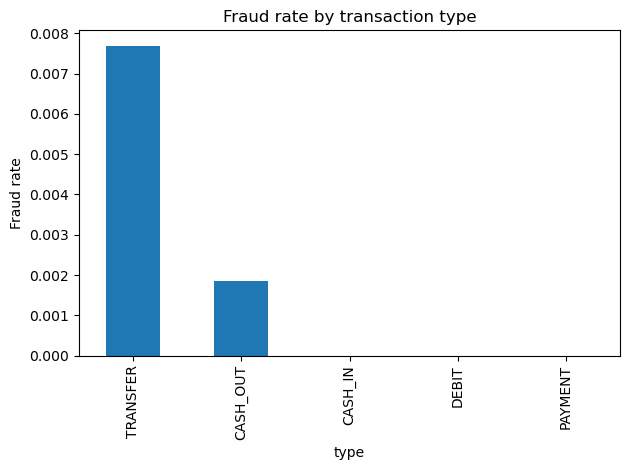

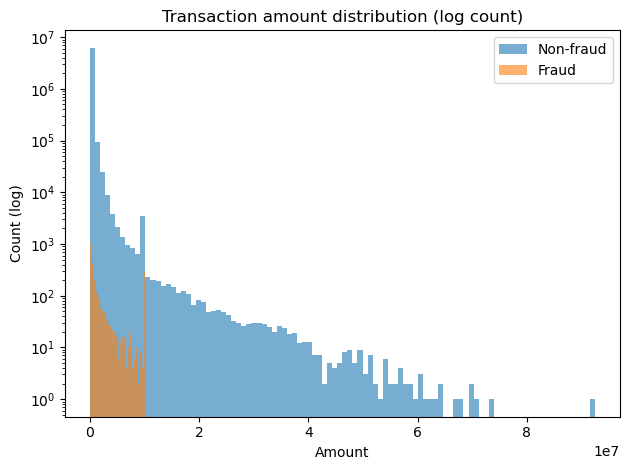

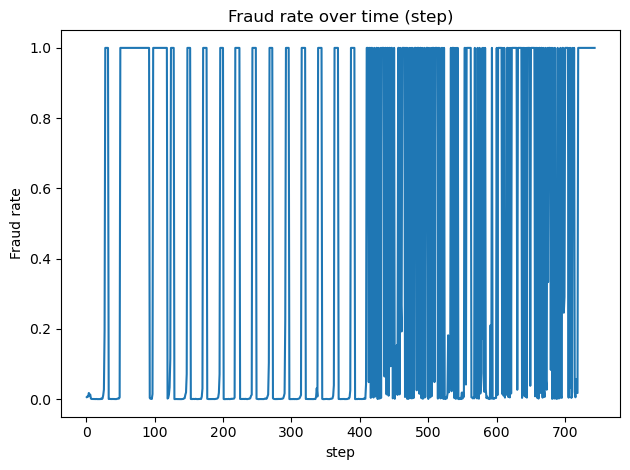

In [11]:
import matplotlib.pyplot as plt
from pathlib import Path

Path("../reports/figures").mkdir(parents=True, exist_ok=True)

# Plot 1: Fraud rate by type
fraud_by_type["fraud_rate"].plot(kind="bar")
plt.title("Fraud rate by transaction type")
plt.ylabel("Fraud rate")
plt.tight_layout()
plt.savefig("../reports/figures/fraud_rate_by_type.png", dpi=150)
plt.show()

# Plot 2: Amount distribution fraud vs non-fraud (log counts)
non = df.loc[df["isFraud"] == 0, "amount"]
frd = df.loc[df["isFraud"] == 1, "amount"]

plt.hist(non, bins=100, alpha=0.6, label="Non-fraud")
plt.hist(frd, bins=100, alpha=0.6, label="Fraud")
plt.yscale("log")
plt.title("Transaction amount distribution (log count)")
plt.xlabel("Amount")
plt.ylabel("Count (log)")
plt.legend()
plt.tight_layout()
plt.savefig("../reports/figures/amount_dist_fraud_vs_nonfraud.png", dpi=150)
plt.show()

# Plot 3: Fraud rate over time (step)
fraud_over_time = df.groupby("step")["isFraud"].mean()
fraud_over_time.plot()
plt.title("Fraud rate over time (step)")
plt.ylabel("Fraud rate")
plt.tight_layout()
plt.savefig("../reports/figures/fraud_rate_over_time.png", dpi=150)
plt.show()


In [12]:
balance_cols = ["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]
display(df[balance_cols].describe().T)


,count,mean,std,min,25%,50%,75%,max
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.0,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.0,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.0,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.0,214661.440,1.111909e+06,3.561793e+08


In [13]:
print("Top 2 by fraud RATE (mean):")
display(fraud_by_type.sort_values("fraud_rate", ascending=False).head(2))

print("Top 2 by fraud COUNT (sum):")
display(fraud_by_type.sort_values("frauds", ascending=False).head(2))


Top 2 by fraud RATE (mean):


,count,frauds,fraud_rate
type,,,
TRANSFER,532909,4097,0.007688
CASH_OUT,2237500,4116,0.001840


Top 2 by fraud COUNT (sum):


,count,frauds,fraud_rate
type,,,
CASH_OUT,2237500,4116,0.001840
TRANSFER,532909,4097,0.007688


In [14]:
df_focus = df[df["type"].isin(["TRANSFER", "CASH_OUT"])].copy()

print("Focus shape:", df_focus.shape)
print("Focus fraud rate:", df_focus["isFraud"].mean(), f"({df_focus['isFraud'].mean()*100:.4f}%)")
df_focus["type"].value_counts()


Focus shape: (2770409, 11)
Focus fraud rate: 0.002964544224336551 (0.2965%)


type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64